In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = ('/Users/Beba/Documents/JupyterNotebooks/NY2013Crimes.csv')
raw_crimes = pd.read_csv(data)
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
1,Greece Town,"96,667",151,0.0,NaN,9,60,82,"2,303",332,"1,925",46,NaN
2,Sleepy Hollow Village,"9,996",8,1.0,NaN,0,1,6,58,9,47,2,0.0
3,Potsdam Village,"9,613",8,0.0,NaN,1,0,7,190,17,168,5,NaN
4,Cornwall Town,"9,543",1,0.0,NaN,0,0,1,42,10,32,0,NaN


In [39]:
raw_crimes.drop('Arson3', axis=1, inplace=True)

In [42]:
raw_crimes.isnull().sum()

City                                      0
Population                                0
Violent\ncrime                            0
Murder and\nnonnegligent\nmanslaughter    0
Rape\n(legacy\ndefinition)2               0
Robbery                                   0
Aggravated\nassault                       0
Property\ncrime                           0
Burglary                                  0
Larceny-\ntheft                           0
Motor\nvehicle\ntheft                     0
dtype: int64

In [40]:
raw_crimes.dropna(axis=0, inplace=True)

In [41]:
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Albany,"97,956",791,8.0,30,227,526,"4,090",705,"3,243",142
1,Greece Town,"96,667",151,0.0,9,60,82,"2,303",332,"1,925",46
2,Sleepy Hollow Village,"9,996",8,1.0,0,1,6,58,9,47,2
3,Potsdam Village,"9,613",8,0.0,1,0,7,190,17,168,5
4,Cornwall Town,"9,543",1,0.0,0,0,1,42,10,32,0


In [54]:
raw_crimes.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Rape                                      float64
Assault                                   float64
dtype: object

In [48]:
raw_crimes['Rape'] = raw_crimes['Rape\n(legacy\ndefinition)2'].str.replace(',','').astype(float)
raw_crimes['Robbery'] = raw_crimes['Robbery'].str.replace(',','').astype(float)
raw_crimes['Assault'] = raw_crimes['Aggravated\nassault'].str.replace(',','').astype(float)
raw_crimes['Property\ncrime'] = raw_crimes['Property\ncrime'].str.replace(',','').astype(float)
raw_crimes['Burglary'] = raw_crimes['Burglary'].str.replace(',','').astype(float)
raw_crimes['Larceny-\ntheft'] = raw_crimes['Larceny-\ntheft'].str.replace(',','').astype(float)
raw_crimes['Motor\nvehicle\ntheft'] = raw_crimes['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)


In [63]:
raw_crimes.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Robbery                                   float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
Rape                                      float64
Assault                                   float64
dtype: object

In [50]:
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Rape,Assault
0,Albany,97956.0,791.0,8.0,30,227.0,526,4090.0,705.0,3243.0,142.0,30.0,526.0
1,Greece Town,96667.0,151.0,0.0,9,60.0,82,2303.0,332.0,1925.0,46.0,9.0,82.0
2,Sleepy Hollow Village,9996.0,8.0,1.0,0,1.0,6,58.0,9.0,47.0,2.0,0.0,6.0
3,Potsdam Village,9613.0,8.0,0.0,1,0.0,7,190.0,17.0,168.0,5.0,1.0,7.0
4,Cornwall Town,9543.0,1.0,0.0,0,0.0,1,42.0,10.0,32.0,0.0,0.0,1.0


In [55]:
raw_crimes.drop(['Rape\n(legacy\ndefinition)2'], axis=1, inplace=True)
raw_crimes.drop(['Aggravated\nassault'], axis=1, inplace=True)

In [61]:
scaled_crimes = pd.DataFrame()

scaled_crimes['City'] = raw_crimes['City']
scaled_crimes['Population'] = preprocessing.scale(raw_crimes['Population'])
scaled_crimes['Violent\ncrime'] = preprocessing.scale(raw_crimes['Violent\ncrime'])
scaled_crimes['Murder and\nnonnegligent\nmanslaughter'] = preprocessing.scale(raw_crimes['Murder and\nnonnegligent\nmanslaughter'])
scaled_crimes['Robbery'] = preprocessing.scale(raw_crimes['Robbery'])
scaled_crimes['Property\ncrime'] = preprocessing.scale(raw_crimes['Property\ncrime'])
scaled_crimes['Burglary'] = preprocessing.scale(raw_crimes['Burglary'])
scaled_crimes['Larceny-\ntheft'] = preprocessing.scale(raw_crimes['Larceny-\ntheft'])
scaled_crimes['Motor\nvehicle\ntheft'] = preprocessing.scale(raw_crimes['Motor\nvehicle\ntheft'])
scaled_crimes['Rape'] = preprocessing.scale(raw_crimes['Rape'])
scaled_crimes['Assault'] = preprocessing.scale(raw_crimes['Assault'])


In [71]:
scaled_crimes.drop(['City'], inplace=True, axis=1)

In [129]:
scaled_crimes.drop(['Assault'], inplace=True, axis=1)

In [130]:
from scipy.stats import mstats
winsorized_Assault = mstats.winsorize(raw_crimes['Assault'], limits=[0.05, 0.05])

scaled_crimes['Assault_Category'] = np.where((raw_crimes['Assault'] > (winsorized_Assault.mean())), 1, 0)

In [125]:
winsorized_Assault.mean()

13.761494252873563

In [126]:
raw_crimes['Assault'].mean()

121.26149425287356

In [140]:
scaled_crimes.drop(['Violent\ncrime'], inplace=True, axis=1)
scaled_crimes.drop(['Property\ncrime'], inplace=True, axis=1)

In [141]:
scaled_crimes.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Burglary,Larceny- theft,Motor vehicle theft,Rape,PopulationSq,PopulationCube,PopXMurder,PopXRobbery,PopXBurglary,PopXLarceny,PopXMotorTheft,PopXRape,Assault_Category
0,0.128882,0.352015,0.149675,0.633720,0.411237,0.263365,0.399994,0.016611,0.002141,0.045368,0.019290,0.081675,0.053001,0.033943,0.051552,1
1,0.126014,-0.085685,-0.012532,0.229874,0.203250,0.025059,0.051958,0.015879,0.002001,-0.010797,-0.001579,0.028967,0.025612,0.003158,0.006547,1
2,-0.066850,-0.030972,-0.069839,-0.119837,-0.093108,-0.084165,-0.097201,0.004469,-0.000299,0.002070,0.004669,0.008011,0.006224,0.005626,0.006498,0
3,-0.067702,-0.085685,-0.070810,-0.111176,-0.074013,-0.076718,-0.080627,0.004584,-0.000310,0.005801,0.004794,0.007527,0.005011,0.005194,0.005459,0
4,-0.067858,-0.085685,-0.070810,-0.118755,-0.095475,-0.089129,-0.097201,0.004605,-0.000312,0.005814,0.004805,0.008058,0.006479,0.006048,0.006596,0


## cleaned the data, now create features

In [64]:
scaled_crimes['PopulationSq'] = (scaled_crimes['Population']) ** 2
scaled_crimes['PopulationCube'] = (scaled_crimes['Population']) ** 3
scaled_crimes['PopXMurder'] = scaled_crimes['Population'] * scaled_crimes['Murder and\nnonnegligent\nmanslaughter']
scaled_crimes['PopXRobbery'] = scaled_crimes['Population'] * scaled_crimes['Robbery']
scaled_crimes['PopXBurglary'] = scaled_crimes['Population'] * scaled_crimes['Burglary']
scaled_crimes['PopXLarceny'] = scaled_crimes['Population'] * scaled_crimes['Larceny-\ntheft']
scaled_crimes['PopXMotorTheft'] = scaled_crimes['Population'] * scaled_crimes['Motor\nvehicle\ntheft']
scaled_crimes['PopXRape'] = scaled_crimes['Population'] * scaled_crimes['Rape']

## split training and test sets

In [142]:
trainsize = int(scaled_crimes.shape[0] / 2)
crimes_test = scaled_crimes.iloc[trainsize:, :].copy()
crimes_train = scaled_crimes.iloc[:trainsize, :].copy()

In [143]:
Y_train = crimes_train['Assault_Category']
X_train = crimes_train.loc[:, ~(crimes_train.columns).isin(['Assault_Category'])]

Y_test = crimes_test['Assault_Category']
X_test = crimes_test.loc[:, ~(crimes_test.columns).isin(['Assault_Category'])]


## do yer models

In [150]:
xvals = np.unique(scaled_crimes[['Population',
                                 'Murder and\nnonnegligent\nmanslaughter',
                                 'Robbery',
                                 'Burglary',
                                 'Larceny-\ntheft',
                                 'Motor\nvehicle\ntheft',
                                 'Rape',
                                 'PopulationSq',
                                 'PopulationCube',
                                 'PopXMurder',
                                 'PopXRobbery',
                                 'PopXBurglary',
                                 'PopXLarceny',
                                 'PopXMotorTheft',
                                 'PopXRape']].values)

In [162]:
x = (scaled_crimes[['Population',
                  'Murder and\nnonnegligent\nmanslaughter',
                  'Robbery',
                  'Burglary',
                  'Larceny-\ntheft',
                  'Motor\nvehicle\ntheft',
                  'Rape',
                  'PopulationSq',
                  'PopulationCube',
                  'PopXMurder',
                  'PopXRobbery',
                  'PopXBurglary',
                  'PopXLarceny',
                  'PopXMotorTheft',
                  'PopXRape']].values.ravel('K'))

x

array([ 0.12888211,  0.12601378, -0.06684976, ...,  0.00851802,
        0.00852689,  0.00854614])

In [234]:
x_dict = raw_crimes.to_dict('list')

In [293]:
raw_crimes['Population'].sort_values(ascending=False)

22     8396126.0
181     258789.0
192     210562.0
237     199134.0
262     143834.0
281     118296.0
0        97956.0
1        96667.0
12       87204.0
13       80705.0
29       78800.0
30       78361.0
31       78215.0
48       68071.0
49       66041.0
50       61686.0
67       58082.0
68       57559.0
69       55198.0
70       51506.0
71       50603.0
93       49898.0
94       49574.0
95       46304.0
96       45535.0
97       44821.0
98       44787.0
99       43866.0
100      43777.0
101      43214.0
         ...    
318       1691.0
319       1688.0
320       1628.0
321       1622.0
322       1602.0
323       1553.0
324       1437.0
325       1433.0
326       1428.0
327       1410.0
328       1385.0
329       1351.0
330       1350.0
331       1274.0
332       1263.0
333       1174.0
334       1122.0
335       1104.0
336       1097.0
337       1022.0
338        997.0
339        980.0
340        977.0
341        872.0
342        829.0
343        762.0
344        658.0
345        656

In [298]:
new_df = pd.DataFrame()

raw_pop = raw_crimes['Population']
bins = [0, 10000, 15000, 25000, 50000, 75000, 300000, 10000000]
labels = ['village',
          'small_town',
          'med_town',
          'lg_town',
          'small_city',
          'medium_city',
          'large_city']

new_df['Population_Category'] = pd.cut(raw_pop, bins=bins,labels=labels)

new_df.head()

,Population_Category
0,medium_city
1,medium_city
2,village
3,village
4,village


In [299]:
new_df['Population_Category'].value_counts()

village        210
lg_town         44
med_town        38
small_town      35
medium_city     12
small_city       8
large_city       1
Name: Population_Category, dtype: int64

In [300]:
new_df['Pop_binned'] = pd.cut(raw_pop, bins=bins)

In [303]:
cleanup_nums = {'Population_Category':     {'village': 1,
                                            'small_town': 2,
                                            'med_town': 3,
                                            'lg_town': 4,
                                            'small_city': 5,
                                            'medium_city': 6,
                                            'large_city': 7}}

In [304]:
new_df.replace(cleanup_nums, inplace=True)

In [305]:
new_df.head()

,Population_Category,Pop_binned
0,6,"(75000, 300000]"
1,6,"(75000, 300000]"
2,1,"(0, 10000]"
3,1,"(0, 10000]"
4,1,"(0, 10000]"


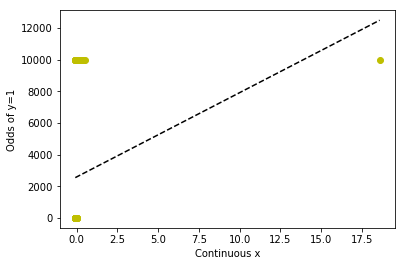

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


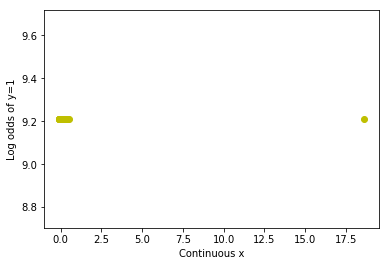

In [240]:
x = new_df['Population_Category']
bin_y = scaled_crimes['Assault_Category']

xvals = np.unique(x)

yodds = []
for xi in xvals: 
    y1_ct = bin_y[x == xi].sum()  
    y0_ct = len(bin_y[x == xi]) - y1_ct +.0001 
    yodds.append((y1_ct / y0_ct))  
      
fit = np.polyfit(xvals, yodds, 1)
fit_fn = np.poly1d(fit)

plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

ln_yodds = np.log(yodds)
fit = np.polyfit(xvals, ln_yodds, 1)
fit_fn = np.poly1d(fit)

plt.plot(xvals, ln_yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Log odds of y=1')
plt.show()

In [228]:
xvals

array([  5.26000000e+02,   6.15000000e+02,   6.56000000e+02,
         6.58000000e+02,   7.62000000e+02,   8.29000000e+02,
         8.72000000e+02,   9.77000000e+02,   9.80000000e+02,
         9.97000000e+02,   1.02200000e+03,   1.09700000e+03,
         1.10400000e+03,   1.12200000e+03,   1.17400000e+03,
         1.26300000e+03,   1.27400000e+03,   1.35000000e+03,
         1.35100000e+03,   1.38500000e+03,   1.41000000e+03,
         1.42800000e+03,   1.43300000e+03,   1.43700000e+03,
         1.55300000e+03,   1.60200000e+03,   1.62200000e+03,
         1.62800000e+03,   1.68800000e+03,   1.69100000e+03,
         1.70200000e+03,   1.73200000e+03,   1.73300000e+03,
         1.75400000e+03,   1.78100000e+03,   1.79200000e+03,
         1.79700000e+03,   1.80500000e+03,   1.81300000e+03,
         1.82000000e+03,   1.82700000e+03,   1.83500000e+03,
         1.85400000e+03,   1.86100000e+03,   1.86200000e+03,
         1.91300000e+03,   1.92600000e+03,   1.94700000e+03,
         1.96000000e+03,

In [ ]:
for column in scaled_crimes:
    column_vals = np.unique(column.values)
    for xi in column_vals:
        y1_ct = raw_crimes.Assault_Category[x == xi].sum()  # The number of trials y = 1.
        y0_ct = len(raw_crimes.Assault_Category[x == xi]) - y1_ct  # The number of trials y = 0.
        column_yodds.append(y1_ct / y0_ct)  # Odds of getting y = 1 for xi.
        

In [164]:
print(len(xvals))
print(len(x))

3626
5220


In [176]:
#Ridge

ridgeregr1 = linear_model.Ridge(alpha=1, fit_intercept=False) 
ridgeregr1.fit(X_train, Y_train)
print("test alpha 1")
print(ridgeregr1.score(X_train, Y_train))


test alpha 1
-0.0789268986238


In [177]:
ridgeregr2 = linear_model.Ridge(alpha=5, fit_intercept=False) 
ridgeregr2.fit(X_train, Y_train)
print("test alpha 5")
print(ridgeregr2.score(X_train, Y_train))


test alpha 5
-0.284811904665


In [179]:
ridgeregr3 = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr3.fit(X_train, Y_train)
print("test alpha 10")
print(ridgeregr3.score(X_train, Y_train))


test alpha 10
-0.336833687148


In [182]:
ridgeregr4 = linear_model.Ridge(alpha=20, fit_intercept=False) 
ridgeregr4.fit(X_train, Y_train)
print("test alpha 20")
print(ridgeregr4.score(X_train, Y_train))


test alpha 20
-0.369060462503


In [181]:
ridgeregr5 = linear_model.Ridge(alpha=50, fit_intercept=False) 
ridgeregr5.fit(X_train, Y_train)
print('test alpha 50')
print(ridgeregr5.score(X_train, Y_train))


test alpha 50
-0.392265185691


In [191]:
#Lasso

lass1 = linear_model.Lasso(alpha=.35)
lassfit1 = lass1.fit(X_train, Y_train)
print('R² for the model:')
print(lass1.score(X_train, Y_train))


R² for the model:
0.0131942911818


In [190]:
lass2 = linear_model.Lasso(alpha=.5)
lassfit2 = lass2.fit(X_train, Y_train)
print('R² for the model:')
print(lass2.score(X_train, Y_train))


R² for the model:
0.013191742452


In [189]:
lass3 = linear_model.Lasso(alpha=1)
lassfit3 = lass3.fit(X_train, Y_train)
print('R² for the model:')
print(lass3.score(X_train, Y_train))


R² for the model:
0.0131767499236


In [187]:
lass4 = linear_model.Lasso(alpha=5)
lassfit4 = lass4.fit(X_train, Y_train)
print('R² for the model:')
print(lass4.score(X_train, Y_train))


R² for the model:
0.0126969890157


In [188]:
lass5 = linear_model.Lasso(alpha=10)
lassfit5 = lass5.fit(X_train, Y_train)
print('R² for the model:')
print(lass5.score(X_train, Y_train))


R² for the model:
0.0111977361786


In [195]:
logregr = linear_model.LogisticRegression(fit_intercept=False)
logregrfit = logregr.fit(X_train, Y_train)
print('R² score')
print(logregr.score(X_train, Y_train))

R² score
0.827586206897


In [196]:
logregr2 = linear_model.LogisticRegression(penalty='l1',
                                           fit_intercept=False)
logregrfit2 = logregr2.fit(X_train, Y_train)
print('R² score')
print(logregr2.score(X_train, Y_train))

R² score
0.850574712644


In [197]:
logregr3 = linear_model.LogisticRegression(penalty='l2',
                                           fit_intercept=False)
logregrfit3 = logregr3.fit(X_train, Y_train)
print('R² score')
print(logregr3.score(X_train, Y_train))

R² score
0.827586206897


# REPORT TIME 